# 3 To - Do - Task


3.1 Warming Up Exercises - Basic Inspection and Exploration:

Problem 1 - Data Read, Write and Inspect:

Complete all following Task:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# 1. Load the provided dataset and import in pandas DataFrame.
df=pd.read_csv('bank.csv')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# 2. Check info of the DataFrame and identify following:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# (a) columns with dtypes=object
df.select_dtypes(object).columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# (b) unique values of those columns.
df.select_dtypes(object).apply(lambda x: x.unique())


,0
job,"[management, technician, entrepreneur, blue-co..."
marital,"[married, single, divorced]"
education,"[tertiary, secondary, unknown, primary]"
default,"[no, yes]"
housing,"[yes, no]"
loan,"[no, yes]"
contact,"[unknown, cellular, telephone]"
month,"[may, jun, jul, aug, oct, nov, dec, jan, feb, ..."
poutcome,"[unknown, failure, other, success]"
y,"[no, yes]"


In [ ]:
# (c) check for the total number of null values in each column.df.info()
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df_numeric=df.select_dtypes(exclude="object")
df_numeric.to_csv("banknumericdata.csv", index=False)

In [ ]:
# 4. Read ”banknumericdata.csv” and Find the summary statistics.
df_numeric = pd.read_csv("banknumericdata.csv")
df_numeric.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"

In [ ]:
#1. Load the provided dataset and import in pandas DataFrame.
df = pd.read_csv("medical_students_dataset.csv")
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [ ]:
#2. Check info of the DataFrame and identify column with missing (null) values.
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


In [ ]:
#3. For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.
df.describe()
#For numerical data, we used median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())



In [ ]:
#For categorical data, we used mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
#4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 12879


In [ ]:
df = df.drop_duplicates()
print("Number of duplicate rows after dropping:", duplicate_count)

Number of duplicate rows after dropping: 12879


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

In [ ]:

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Problem - 1:
# Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
# Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
# median, maximum value, and minimum value of the ’Fare’ column?

passenger_info = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_passengers = passenger_info[passenger_info['Pclass'] == 1]
fare_mean = first_class_passengers['Fare'].mean()
fare_median = first_class_passengers['Fare'].median()
fare_max = first_class_passengers['Fare'].max()
fare_min = first_class_passengers['Fare'].min()

print("Mean Fare: {:.2f}".format(fare_mean))
print("Median Fare: {:.2f}".format(fare_median))
print("Maximum Fare: {:.2f}".format(fare_max))
print("Minimum Fare: {:.2f}".format(fare_min))

Mean Fare: 84.15
Median Fare: 60.29
Maximum Fare: 512.33
Minimum Fare: 0.00


In [ ]:
#Problem - 2:
# How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
# this out, drop them from your DataFrame.
age_na_count = first_class_passengers['Age'].isnull().sum()
print(f"Number of null values in 'Age': {age_na_count}")

Number of null values in 'Age': 30


In [ ]:
first_class_passengers_clean = first_class_passengers.dropna(subset=['Age'])
age_na_count_after = first_class_passengers_clean['Age'].isnull().sum()
print(f"Number of null values in 'Age' after dropping: {age_na_count_after}")

Number of null values in 'Age' after dropping: 0


In [ ]:
# Problem - 3:

# The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:

# • ’C’ for Cherbourg
# • ’Q’ for Queenstown
# • ’S’ for Southampton
# Task:
# 1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
# ’Embarked Q’, ’Embarked S’).
embarked_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# 2. Add these new columns to the original DataFrame.
df = pd.concat([df, embarked_encoded], axis=1)
# 3. Drop the original ’Embarked’ column.
df = df.drop('Embarked', axis=1)
# 4. Print the first few rows of the modified DataFrame to verify the changes.
df.head()

Mean survival rates by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


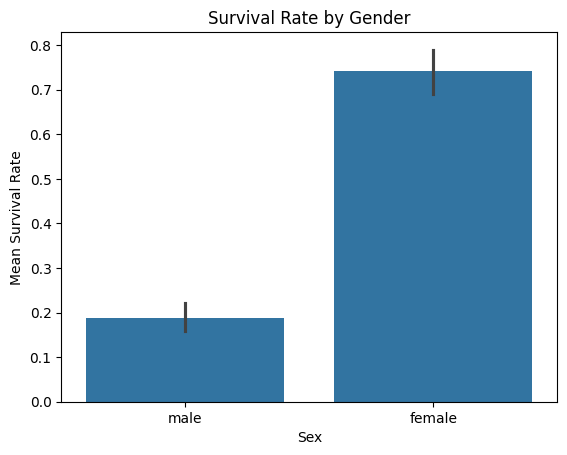

In [ ]:
# Problem - 4:

# Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
# ization to show how the survival distributions vary by gender.
import matplotlib.pyplot as plt

mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by Sex:\n", mean_survival_by_sex)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.ylabel("Mean Survival Rate")
plt.show()

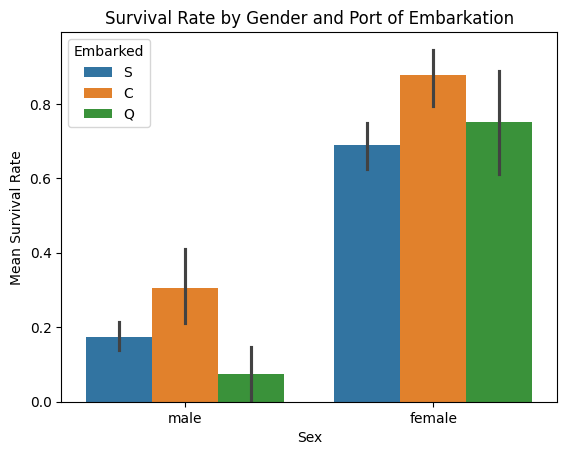

In [ ]:
# Problem - 5:

# Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
# barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).
df = pd.read_csv("Titanic-Dataset.csv")
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df)
plt.title("Survival Rate by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.show()